# The Sparks Foundation
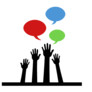
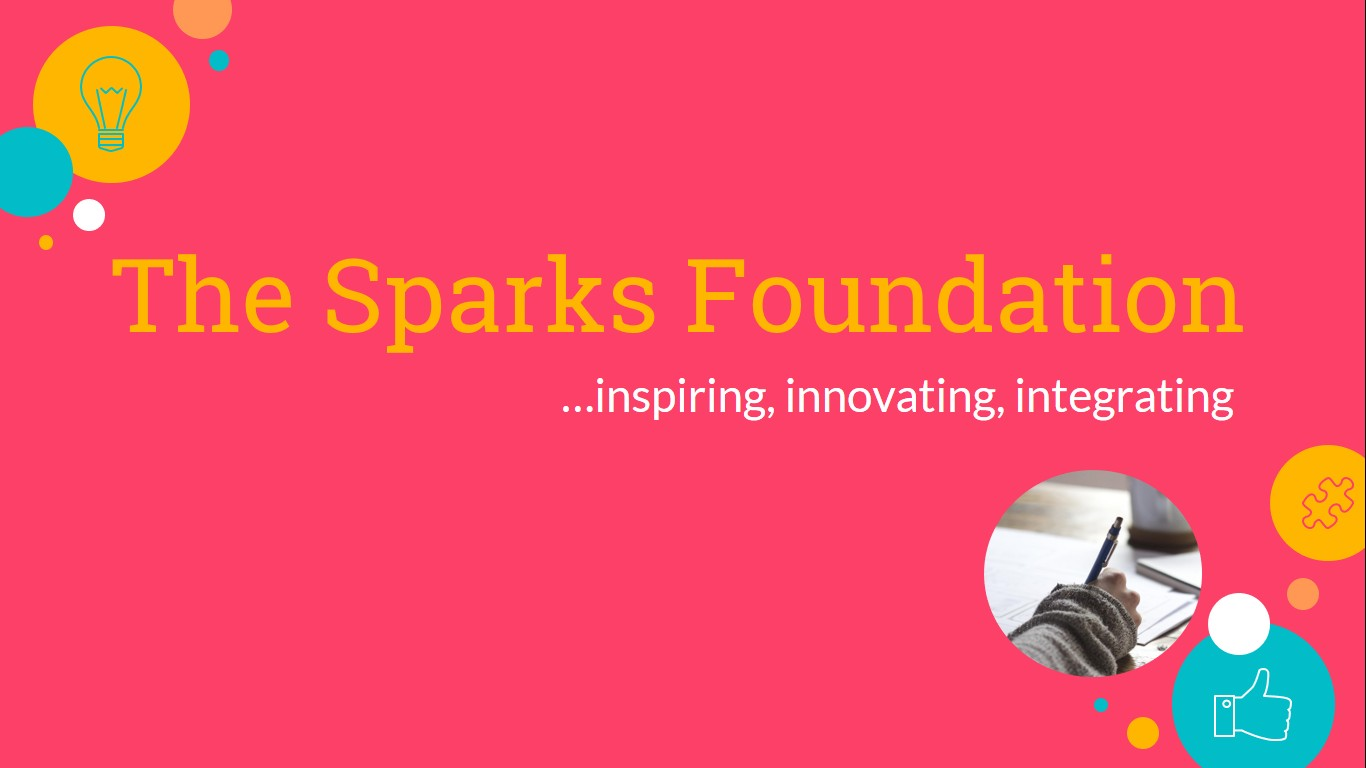

# Task 1 : Study Score Prediction with Hours Study/day as a Feature 

# Made By 
# Vikram Sharma (Data Science and Business Analytics Intern)


# Reading and Seeing the Dataset

In [9]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("Student.csv")  # Dataset from url : https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
# Statistics
df.describe().T

# Min Score : 17
# Max Score : 95
# Min Hours : 1.1
# Max Hours : 9.2


,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [18]:
filt = (df["Scores"].values == 17) | (df["Scores"].values == 95) | (df["Hours"].values==1.1)|(df["Hours"].values==9.2) 

df[filt]

,Hours,Scores
6,9.2,88
14,1.1,17
15,8.9,95


In [22]:
# Check for null values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

# EDA

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Matrix of Student Study Dataset')

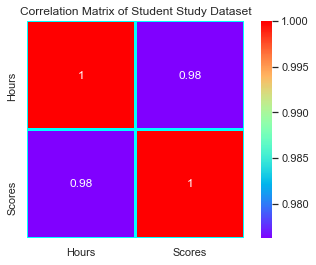

In [77]:
sns.heatmap(df.corr(),cmap="rainbow",square=True,annot=True,linewidth=2,linecolor="aqua")
plt.title("Correlation Matrix of Student Study Dataset")

# Hours vs Score are Strongly Positively Correlated


Text(0.5, 1.0, 'Regression Plot of Hours Vs Scores')

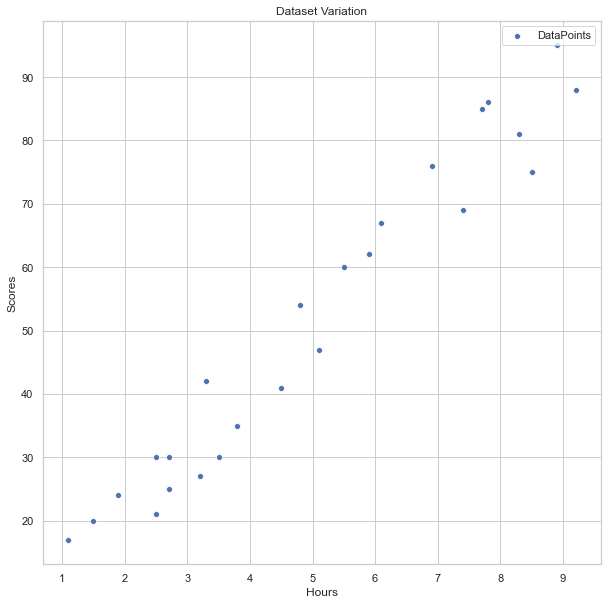

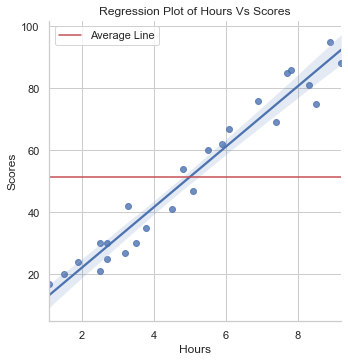

In [78]:
plt.figure(figsize=(10,10))

sns.scatterplot(x="Hours",y="Scores",data=df,label="DataPoints")
plt.title("Dataset Variation")
sns.lmplot(x="Hours",y="Scores",data=df)

plt.axhline(y=df["Scores"].mean(),label="Average Line",color="r")
sns.set(style="whitegrid")
plt.legend()
plt.title("Regression Plot of Hours Vs Scores")



Text(0.5, 1.0, 'Distribution and Regression Plot of Dataset')

<Figure size 1440x1440 with 0 Axes>

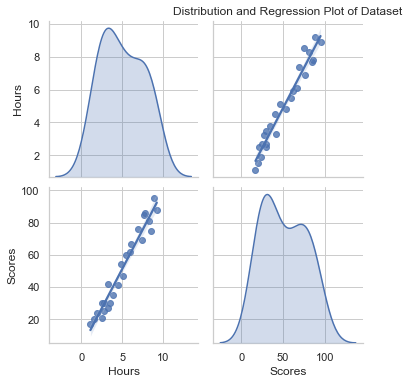

In [79]:
# Seeing Distribution
plt.figure(figsize=(20,20))

sns.pairplot(data=df,kind="reg",diag_kind="kde")
plt.title("Distribution and Regression Plot of Dataset")

# Modeling

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error
from sklearn.model_selection import train_test_split

In [25]:
X,Y = df[["Hours"]],df["Scores"]

# Doing 60 + 40 split on data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.4,random_state=12)

print("Train Size : ",(x_train.shape,y_train.shape))
print("Test Size : ",(x_test.shape,y_test.shape))

Train Size :  ((15, 1), (15,))
Test Size :  ((10, 1), (10,))


In [26]:
# Training of Model

model = LinearRegression(normalize=True)
model.fit(x_train,y_train)


LinearRegression(normalize=True)

In [31]:
# Finding the Line of Regression

slope = model.coef_
intercp = model.intercept_
#  Equation of Line
#     y = mx  + c
#     m= slope , c = intercept
#
print("Slope : {} and Intercept : {}".format(slope[0],intercp))

Slope : 9.567451789854662 and Intercept : 4.374618277441606


In [32]:
# Shwoing Concept Behind Linear Regression Predict() method in sklearn

def MyPredict(x):
    d = (slope*x  + interp).values
    prediction =pd.DataFrame(d,columns=["Scores"])
    return prediction

In [33]:
MyPredict(x_test)

,Scores
0,75.173762
1,56.995603
2,62.736074
3,53.168622
4,89.524939
5,83.784468
6,37.860700
7,14.898815
8,40.730935
9,28.293248


In [34]:
# Same Using sklearn
y_pd = model.predict(x_test)
y_pd

array([75.17376152, 56.99560312, 62.7360742 , 53.16862241, 89.52493921,
       83.78446813, 37.86069954, 14.89881525, 40.73093508, 28.29324775])

In [37]:
# Finding Accurracy and loss function
mean_sq_err = mse(y_test.values,y_pd)
r2_accuracy = r2(y_test.values , y_pd)
mae = mean_absolute_error(y_test.values,y_pd)

# Loss Function ==> must be min
print("*"*10,"Loss Functions","*"*10)
print("Mean Squared Error : ",mean_sq_err)
print("Root Mean Squared Error : ",np.sqrt(mean_sq_err))
print("Mean Absolute Error : ",mae)

print()
print()
#Accuracy Matrix ==>Must be Maximise
print("*"*10,"Accuracy Metrics","*"*10)
print("Accuracy : ",r2_accuracy*100)


********** Loss Functions **********
Mean Squared Error :  29.33449053675226
Root Mean Squared Error :  5.416132433457684
Mean Absolute Error :  5.085630266357516


********** Accuracy Metrics **********
Accuracy :  95.30768274733632


# We get 95% Accuracy


In [38]:
# Comparing Traing Vs Testing Accuracy
train_acc =  model.score(x_train,y_train)
test_acc  =  model.score(x_test,y_test)

print("Training Accuracy : ",train_acc*100)
print("Testing Accuracy : ",test_acc*100)





Training Accuracy :  95.01113526288644
Testing Accuracy :  95.30768274733632


# Visualize The Model 

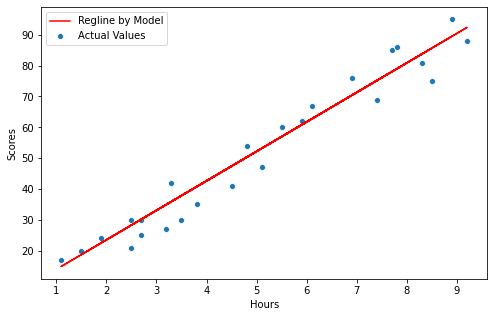

In [41]:
# Visualize the Regression Line
plt.figure(figsize=(8,5))
sns.scatterplot(x="Hours",y="Scores",data=df,label="Actual Values")
x=X.values
y=slope*x+interp
plt.plot(x,y,"r",label="Regline by Model")
plt.legend()

# Prediction On Real Problem

In [42]:
hour = 9.25
score = model.predict([[hour]])
print("Score For Studying 9.25 hrs/day will be :  ",score[0])

Score For Studying 9.25 hrs/day will be :   92.87354733359723


In [47]:
# Try for Differnt Values
hour = int(input("Enter the Hours You Study per Day : "))
score = model.predict([[hour]])
print("The Score of Your is : ",score[0])

Enter the Hours You Study per Day : 2
The Score of Your is :  23.50952185715093


# Thank You for Watching